In [139]:
import json
from time import perf_counter

import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import Model, Sequential
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Dense, InputLayer
from tensorflow.python.keras.metrics import mean_squared_error
from tensorflow.python.keras.optimizers import gradient_descent_v2

from utils import create_dataset

In [140]:
with open("config.json", "r") as f:
    config = json.load(f)

In [141]:
# data = pd.read_csv('dataset/dataset0.csv')
# X, Y = data['X'], data['Y']
data=config["data"]
X, Y = create_dataset(nb=data["number_of_samples"], mean=data["mean"], standard_deviation=data["standard_deviation"])

In [142]:
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, train_size=0.8)

In [203]:
model: Model = Sequential([
    InputLayer(input_shape=(1,)),
    Dense(1)
])

model.compile(
    optimizer=gradient_descent_v2.SGD(learning_rate=0.1),
    loss='mean_squared_error',)

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [204]:
tstart = perf_counter()

history = model.fit(
    x_train,
    y_train,
    epochs=500,
    validation_split = 0.2,
    callbacks=[EarlyStopping(monitor='loss', patience=5, restore_best_weights=True, min_delta=0.001)]
    )

print(f'\n\nexecution time: {perf_counter() - tstart}')

Epoch 1/500
1/1 [==============================] - 0s 274ms/step - loss: 132.7649 - val_loss: 9.8705
Epoch 2/500
1/1 [==============================] - 0s 19ms/step - loss: 75.1155 - val_loss: 8.3844
Epoch 3/500
1/1 [==============================] - 0s 22ms/step - loss: 46.5263 - val_loss: 6.4887
Epoch 4/500
1/1 [==============================] - 0s 25ms/step - loss: 31.5115 - val_loss: 4.6284
Epoch 5/500
1/1 [==============================] - 0s 24ms/step - loss: 22.9964 - val_loss: 3.0476
Epoch 6/500
1/1 [==============================] - 0s 24ms/step - loss: 17.7203 - val_loss: 1.8502
Epoch 7/500
1/1 [==============================] - 0s 21ms/step - loss: 14.1570 - val_loss: 1.0544
Epoch 8/500
1/1 [==============================] - 0s 22ms/step - loss: 11.5735 - val_loss: 0.6314
Epoch 9/500
1/1 [==============================] - 0s 23ms/step - loss: 9.6027 - val_loss: 0.5303
Epoch 10/500
1/1 [==============================] - 0s 26ms/step - loss: 8.0489 - val_loss: 0.6937
Epoch 11/

In [205]:
x_lin = tf.linspace(min(x_train.to_numpy()), max(x_train.to_numpy()), len(X))
y_lin = model.predict(x_lin)

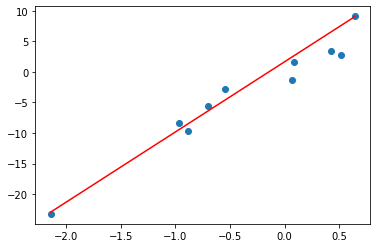

In [206]:
plt.scatter(X, Y)
plt.plot(x_lin, y_lin, color='red')
plt.show()

In [207]:
model.get_weights()

[array([[11.484939]], dtype=float32), array([1.6562294], dtype=float32)]

In [208]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 21ms/step - loss: 7.7996


7.79960298538208

In [209]:
y_pred = model.predict(x_test)

In [210]:
mean_squared_error(
    pd.DataFrame(y_test), pd.DataFrame(y_pred)
)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([14.635121,  0.964085], dtype=float32)>

In [211]:
data = pd.read_csv(f'dataset/dataset1.csv')
x_eval = data['X']
y_eval = data['Y']

model.evaluate(x_eval, y_eval, return_dict = True)

1/1 [==============================] - 0s 57ms/step - loss: 4467.5078


{'loss': 4467.5078125}

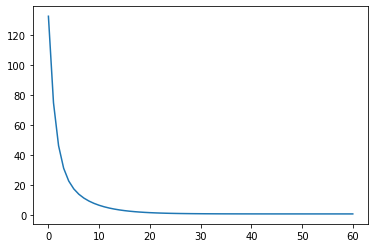

In [212]:
plt.plot(history.history['loss'])

In [213]:
model.predict([1.474998454872067])

array([[18.596497]], dtype=float32)

In [214]:
data = model.get_weights()

data

[array([[11.484939]], dtype=float32), array([1.6562294], dtype=float32)]